In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [20]:
basic_info = pd.read_csv('saffronart_basic_info.csv')
basic_info.head()

,artist,birth date,birth place,death date,title,winning bid,auction date,category,style,age
0,akhilesh,1956-01-01 00:00:00,Indore,NaN,Divine Conversation,9000.0,2019-06-01 00:00:00,painting,abstract,63.0
1,akhilesh,1956-01-01 00:00:00,Indore,NaN,In search of Untitled forms -II,1120.0,2013-11-01 00:00:00,painting,abstract,63.0
2,akhilesh,1956-01-01 00:00:00,Indore,NaN,In Search of Untitled Lines,6186.0,2013-08-01 00:00:00,painting,unknown,63.0
3,akhilesh,1956-01-01 00:00:00,Indore,NaN,Magadhi,2400.0,2013-02-01 00:00:00,painting,abstract,63.0
4,akhilesh,1956-01-01 00:00:00,Indore,NaN,Untitled,2942.0,2013-02-01 00:00:00,painting,abstract,63.0


### Some basic indicators:

In [21]:
total_value_sum = basic_info['winning bid'].sum() #sum of all the winning bids
total_value_sum

303654874.0

In [22]:
avg_price = basic_info['winning bid'].mean() #average price
avg_price

28776.997156937072

In [23]:
most_expensive_piece = basic_info.loc[basic_info['winning bid'] == basic_info["winning bid"].max()]
most_expensive_piece

,artist,birth date,birth place,death date,title,winning bid,auction date,category,style,age
6474,tyeb mehta,1925-01-01 00:00:00,NaN,2009-01-01 00:00:00,Kali,3998000.0,2018-06-01 00:00:00,painting,figurative,84.0


In [24]:
cheapest_piece = basic_info.loc[basic_info['winning bid'] == basic_info["winning bid"].min()]
cheapest_piece

,artist,birth date,birth place,death date,title,winning bid,auction date,category,style,age
444,kriti arora,1972-01-01 00:00:00,NaN,NaN,A) VIMILA MEHRA AND SUSPECT B) CRIME WOMEN CEL...,30.0,2015-10-01 00:00:00,unknown,unknown,47.0
652,dubbu bariya,NaN,NaN,NaN,HELMET (BHIL PAINTING),30.0,2016-05-01 00:00:00,unknown,unknown,NaN
2176,manas das,NaN,NaN,NaN,A) WALL COMPOSITION B) MARRIAGE C) KAJAOOE TRE...,30.0,2015-11-01 00:00:00,unknown,unknown,NaN
5393,anita khemka,1981-01-01 00:00:00,Hyderabad,NaN,UNTITLED,30.0,2015-10-01 00:00:00,unknown,unknown,38.0
9799,sojwal samant,1972-01-01 00:00:00,Baroda,NaN,UNTITLED,30.0,2015-10-01 00:00:00,unknown,unknown,47.0
9964,maga saraea,NaN,NaN,NaN,UNTITLED (WARLI PAINTING),30.0,2016-11-01 00:00:00,unknown,unknown,NaN
12041,anup mathew thomas,1977-01-01 00:00:00,Kochi,NaN,STUDY FOR CABINET,30.0,2014-12-01 00:00:00,unknown,unknown,42.0


In [25]:
sold_pieces_by_artist = basic_info.groupby('artist')['winning bid'].count()
best_selling_artist = sold_pieces_by_artist[sold_pieces_by_artist == sold_pieces_by_artist.max()]
best_selling_artist

artist
m f husain    506
Name: winning bid, dtype: int64

In [26]:
highest_value_sum_artist = basic_info.groupby('artist')['winning bid'].sum()
highest_value_sum_artist = highest_value_sum_artist[highest_value_sum_artist == highest_value_sum_artist.max()]
highest_value_sum_artist 

artist
s h raza    39438029.0
Name: winning bid, dtype: float64

### Information by artist/category/style


In [27]:
def value_sum_of(column, value): #rename the parameters
    try:
        return basic_info.loc[basic_info[column] == value, "winning bid"].sum()
    except KeyError:
        print("{column}")

def highest_price_of(column, value):
    return basic_info.loc[basic_info[column] == value, "winning bid"].max()

def lowest_price_of(column, value):
    return basic_info.loc[basic_info[column] == value, "winning bid"].min()

def avg_price_of(column, value):
    return basic_info.loc[basic_info[column] == value, "winning bid"].mean()

def how_many_of(column, value): #returns the count of sold pieces by the specified value
    return basic_info.loc[basic_info[column] == value, "winning bid"].count()
    
#NOTE: Input the column and value in LOWER CASE!    

print(how_many_of("artist", "jamini roy"))
print(avg_price_of('category', 'sculpture'))
print(highest_price_of('style', 'abstract'))

91
28819.288770053477
3711765.0


In [28]:
basic_info['auction date'] = pd.to_datetime(basic_info['auction date'])
basic_info['death date'] = pd.to_datetime(basic_info['death date'])
basic_info['birth date'] = pd.to_datetime(basic_info['birth date'])

auction date
2000-12-31       96853.0
2001-12-31      366054.0
2002-12-31      796334.0
2003-12-31     1119069.0
2004-12-31     3512564.0
2005-12-31    14081365.0
2006-12-31    32440990.0
2007-12-31    22378101.0
2008-12-31    26331332.0
2009-12-31     9933734.0
2010-12-31    21131447.0
2011-12-31    14626044.0
2012-12-31    13960651.0
2013-12-31     9675847.0
2014-12-31    17223651.0
2015-12-31    22386129.0
2016-12-31    23600802.0
2017-12-31    22342628.0
2018-12-31    28878485.0
2019-12-31    18772794.0
Freq: A-DEC, Name: winning bid, dtype: float64


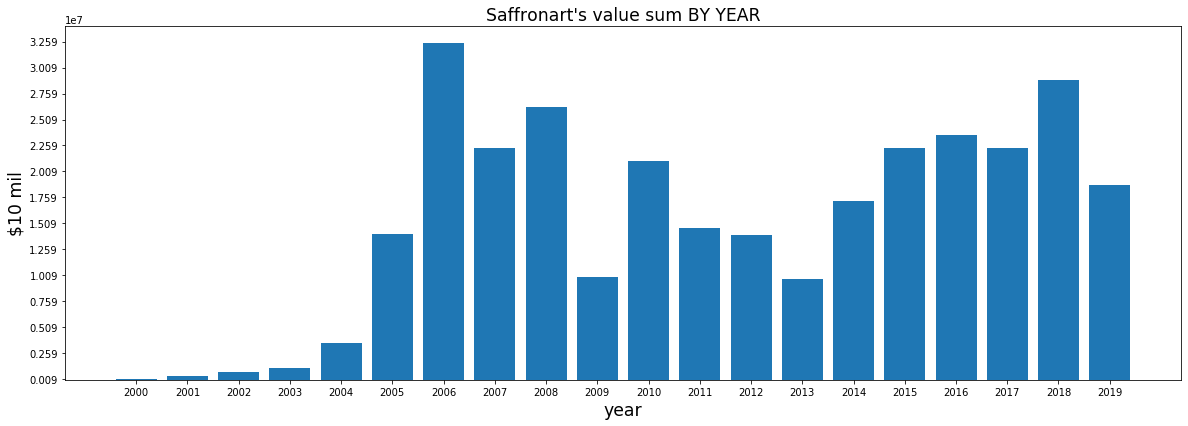

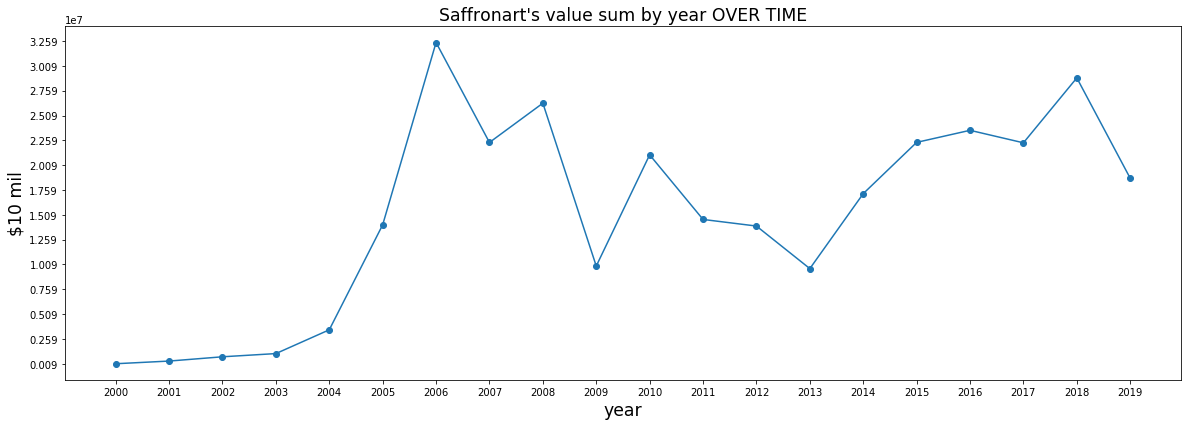

In [29]:
value_sum_by_year = basic_info.groupby(pd.Grouper(key = 'auction date', freq = 'Y'))['winning bid'].sum()

years = [year for year in range(2000, 2020)] #scale of the x-axis (years)
value_sum = [value for value in range(90000, 35000000, 2500000)] #scale of the y-axis (value sum)

####

plt.figure(figsize = (20, 6.5))
plt.title("Saffronart's value sum BY YEAR", fontsize = 'xx-large')

plt.xlabel("year", fontsize = 'xx-large')
plt.ylabel("$10 mil", fontsize = 'xx-large')

plt.bar(years, value_sum_by_year.values)

plt.xticks(years) 
plt.yticks(value_sum)

####

plt.figure(figsize = (20, 6.5))
plt.title("Saffronart's value sum by year OVER TIME", fontsize = 'xx-large')

plt.xlabel("year", fontsize = 'xx-large')
plt.ylabel("$10 mil", fontsize = 'xx-large')

plt.plot(years, value_sum_by_year.values, marker = 'o')

plt.xticks(years)
plt.yticks(value_sum)

print(value_sum_by_year)

auction date
2000-12-31     1760.963636
2001-12-31     4519.185185
2002-12-31     4576.632184
2003-12-31     9172.696721
2004-12-31    17651.075377
2005-12-31    40580.302594
2006-12-31    65537.353535
2007-12-31    59516.226064
2008-12-31    65993.313283
2009-12-31    37485.788679
2010-12-31    81904.833333
2011-12-31    30921.868922
2012-12-31    18814.893531
2013-12-31    13128.693351
2014-12-31    15242.169027
2015-12-31    15990.092143
2016-12-31    27733.022327
2017-12-31    28139.329975
2018-12-31    27714.476967
2019-12-31    30674.500000
Freq: A-DEC, Name: winning bid, dtype: float64


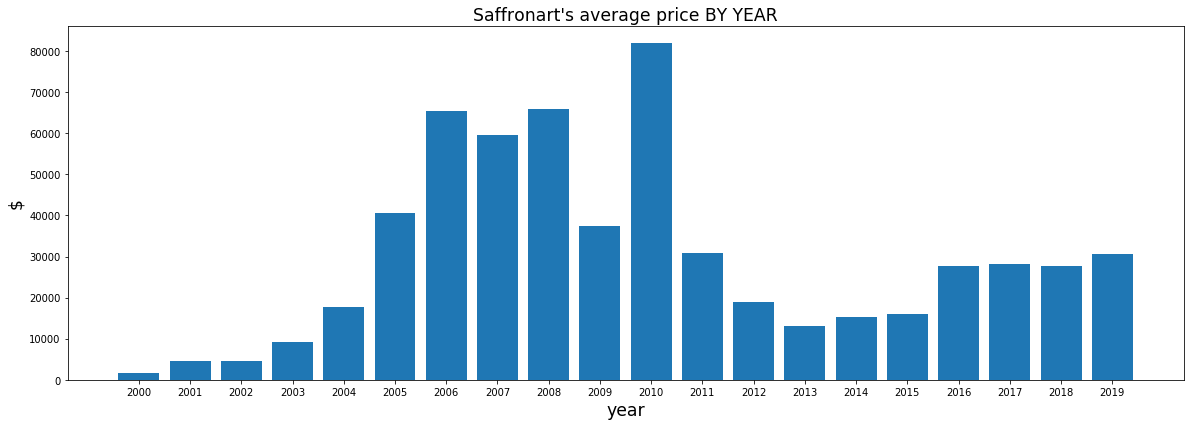

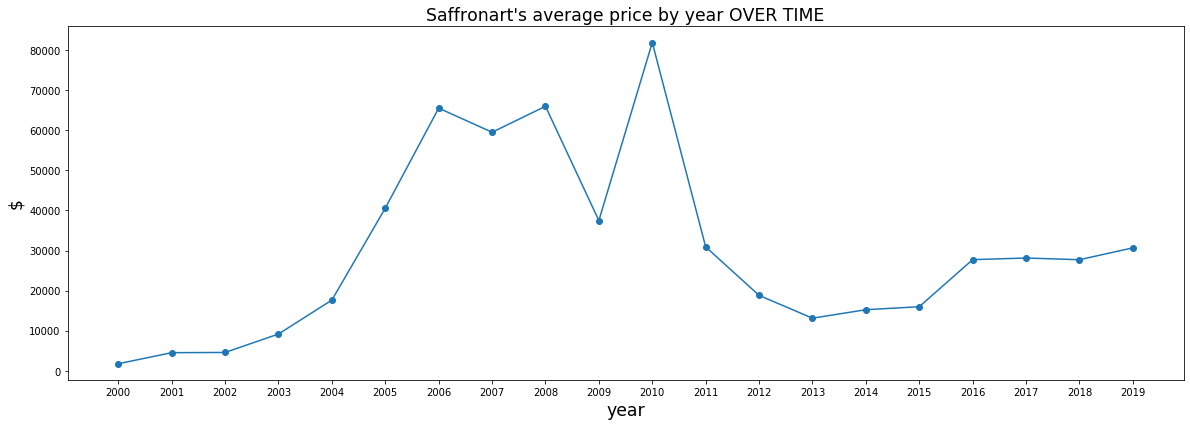

In [30]:
avg_price_by_year = basic_info.groupby(pd.Grouper(key = 'auction date', freq = 'Y'))['winning bid'].mean()

###

plt.figure(figsize = (20, 6.5))
plt.title("Saffronart's average price BY YEAR", fontsize = 'xx-large')

plt.xlabel("year", fontsize = 'xx-large')
plt.ylabel("$", fontsize = 'xx-large')

plt.bar(years, avg_price_by_year.values)

plt.xticks(years)

###

plt.figure(figsize = (20, 6.5))
plt.title("Saffronart's average price by year OVER TIME", fontsize = 'xx-large')

plt.xlabel("year", fontsize = 'xx-large')
plt.ylabel("$", fontsize = 'xx-large')

plt.plot(years, avg_price_by_year.values, marker = 'o')

plt.xticks(years)

###

print(avg_price_by_year)

In [31]:
#average price by birth year 
#
#
#
#
#

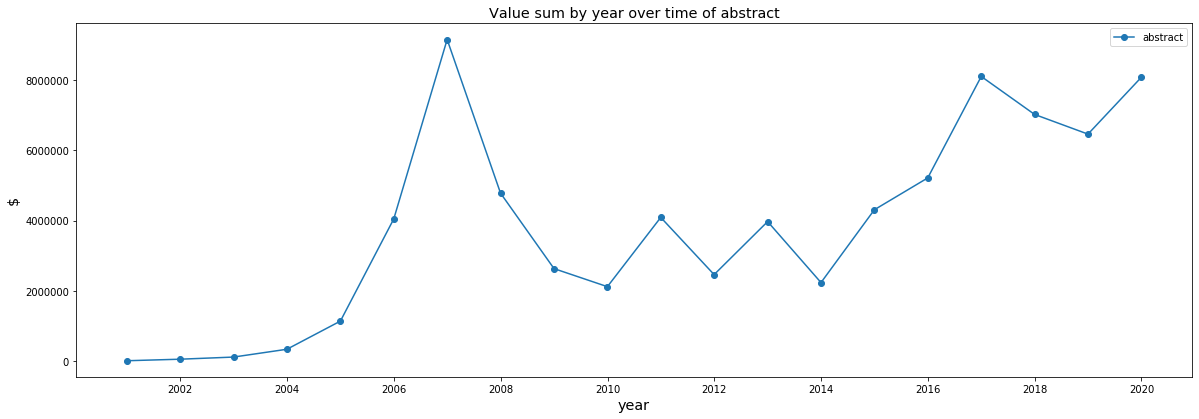

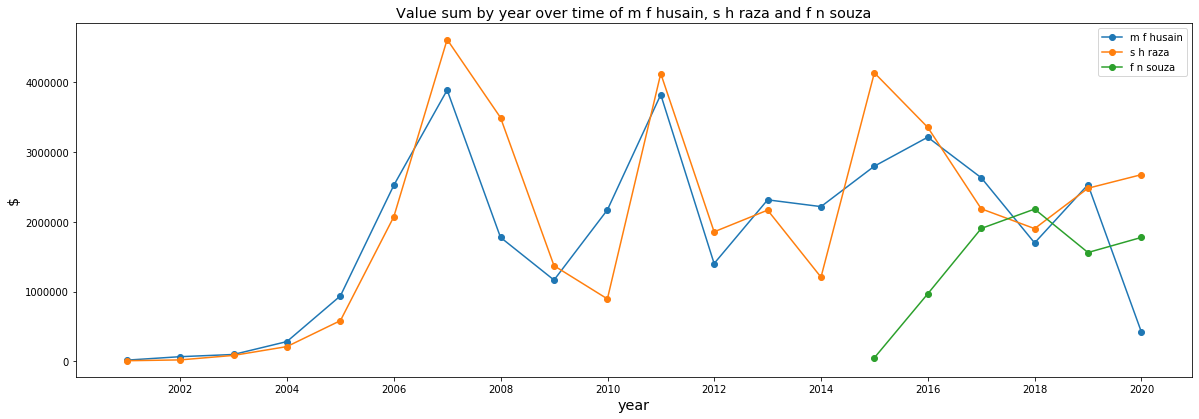

In [32]:
def plot_valsum_over_time(column, col_values_list): #plot value sum over time for a list of values
    plt.figure(figsize = (20, 6.5))
    
    value_sum_by_year = basic_info.groupby([column, pd.Grouper(key = 'auction date', freq = 'Y')])['winning bid'].sum()
    
    for value in col_values_list:
        plt.plot(value_sum_by_year.loc[value].index, value_sum_by_year.loc[value].values, marker = 'o')
        
    plt.legend(col_values_list)
        
    #Creating the plot's title:
    title = 'Value sum by year over time of '
    
    if len(col_values_list) > 1: 
        for value in col_values_list[:-2]:
            title += value + ', '
        title += col_values_list[-2] + ' and '

    title += col_values_list[-1]
    
    plt.title(title, fontsize = 'x-large')
    
    plt.xlabel("year", fontsize = 'x-large')
    plt.ylabel("$", fontsize = 'x-large')

    
plot_valsum_over_time('style', ['abstract'])
plot_valsum_over_time('artist', ['m f husain', 's h raza', 'f n souza'])

style
abstract       25.148159
calligraphy     0.017181
figurative     53.670679
landscape      13.116749
still life      4.141203
unknown         3.906029
Name: winning bid, dtype: float64

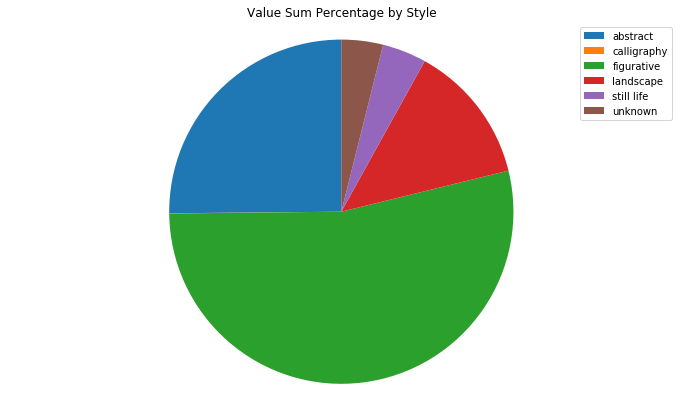

In [33]:
value_sum_by_style = basic_info.groupby('style')['winning bid'].sum()

total_value_sum = basic_info['winning bid'].sum()

percentage_by_style = value_sum_by_style.apply(lambda x: 100*x/total_value_sum)  

###

plt.figure(figsize = (12, 7))

plt.pie(percentage_by_style.values, startangle=90)

plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle

plt.legend(percentage_by_style.index)

plt.title('Value Sum Percentage by Style')

percentage_by_style

In [34]:
color_names = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', 
               '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
               '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
               '#000075', '#808080', '#ffffff', '#000000']

category
ceramics                 0.010536
chemical alterations     0.016637
digital art              0.100488
drawing                  1.190736
installation             0.576799
painting                90.507671
photography              0.327199
print making             0.498060
relief sculpture         0.109218
sculpture                3.549561
unknown                  3.111801
video                    0.001296
Name: winning bid, dtype: float64

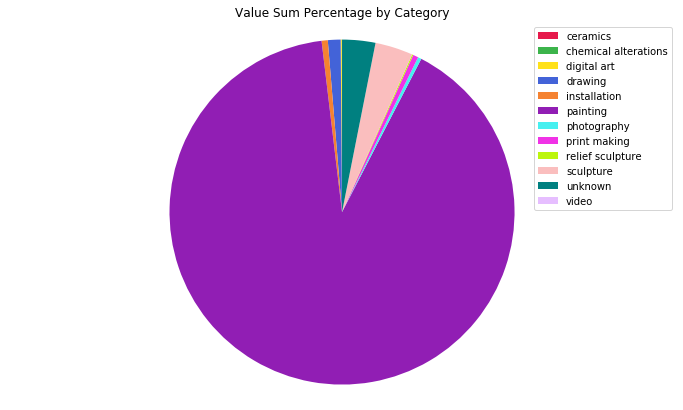

In [35]:
value_sum_by_category = basic_info.groupby('category')['winning bid'].sum()

total_value_sum = basic_info['winning bid'].sum()

percentage_by_category = value_sum_by_category.apply(lambda x: 100*x/total_value_sum) #document this

###

plt.figure(figsize = (12, 7))

plt.pie(percentage_by_category.values, startangle=90, colors = color_names)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.legend(percentage_by_category.index)

plt.title('Value Sum Percentage by Category')

percentage_by_category

In [36]:
#find out about what determines art prices?
    #artist's reputation, the age of the art, etc.
#put the art martket besides other markets: stock market, etc
    #https://beta.nseindia.com/market-data/eod-historical-data-subscription
    #https://www.bseindia.com/
#put the art martket in the context of growth(gdp) and other macro measures
#contact saffronart to have the demographics of art buyers 